In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#%config InlineBackend.figure_format = 'retina'

In [2]:
def mcpi(N):
    
    X,Y = np.random.uniform(size=(2,N))
    Nhit = np.sum(X**2+Y**2<1)
    
    return 4*Nhit/N

In [3]:
# x-axis points for semilogx plot
pts=np.array([1,2,3,4,6,8,10,20,30,40,60,80,100,200,300,400,600,800,1000,2000,3000,4000,6000,8000,10000])

In [4]:
# Vectorize our mcpi and makes it can accept vector input
# The last two values (1,1) indicates our original mcpi takes 1 input and generates 1 output
vec_mcpi=np.frompyfunc(mcpi,1,1)

# Cacluating pi estimation via vectorized mcpi
pi=vec_mcpi(np.array(pts))

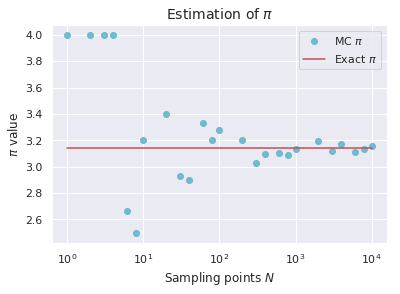

In [5]:
# Plot
plt.semilogx(pts,pi,"co",alpha=.9,label="MC $\pi$")
plt.semilogx([1,10000],[3.14,3.14],"r",label="Exact $\pi$")
plt.xlabel("Sampling points $N$")
plt.ylabel("$\pi$ value")
plt.title("Estimation of $\pi$",fontsize=14)
plt.legend()
#plt.savefig("pi_est.png",dpi=300,bbox_inches = 'tight')

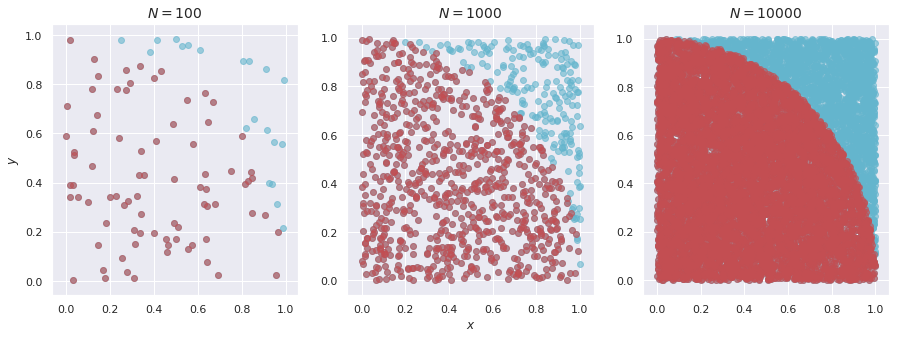

In [6]:
# Plot

# Number of sampling points
size=[100,1000,10000]

plt.figure(figsize=(15,5))

for n in range(3):
    # Randomly generate (x,y) coordinate for each point
    X,Y = np.random.uniform(size=(2,size[n]))
    # Points lie within the unit circle
    Nhit = (X**2+Y**2)<1
    
    plt.subplot(1,3,n+1)
    plt.scatter(X,Y,alpha=0.6,c="c")
    plt.scatter(X[Nhit],Y[Nhit],c="r",alpha=0.6)
    
    # I only want the left-most diagram contains y-label
    if n == 1:
        plt.xlabel("$x$")
    # I only want the middle diagram contains x-label
    if n == 0: 
        plt.ylabel("$y$")
    
    plt.title("$N=$"+str(size[n]),fontsize=14)

In [7]:
def buffonpi(x):
    """
    Define pi estimation by Buffon's needle buffonpi(x)
    x: Initial x-position of the needle between (0,1)
    """    

    # Step 2  
    dx, dy = np.random.uniform(0, 1, 2)
    l = np.sqrt(dx**2 + dy**2)
    
    # Step 3
    if l > 1:
        """
        python does not support goto natively!
        In order to go back to Step 2, we have to call buffonpi again and
        feed it with the same input x.
        """
        return buffonpi(x)

    # Step 4
    else:       
        xprime = x - (dx/l)
        
        # Step 5
        if xprime < 0:
            return 1
        else:
            return 0

In [11]:
pi=[]

for needle in pts:
    xc = np.random.uniform(0, 1, needle)
    
    Nhit = [] 
    for i in xc:
        Nhit.append(buffonpi(i))
    pi.append(2*needle/sum(Nhit))

# return the number of needles that touches the crack

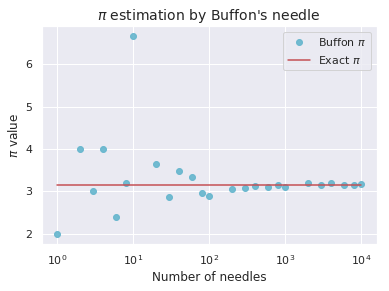

In [12]:
plt.semilogx(pts,pi,"co",alpha=.9,label="Buffon $\pi$")
plt.semilogx([1,10000],[3.14,3.14],"r",label="Exact $\pi$")
plt.xlabel("Number of needles")
plt.ylabel("$\pi$ value")
plt.title("$\pi$ estimation by Buffon's needle",fontsize=14)
plt.legend()
#plt.savefig("pi_est_buffon.png",dpi=300,bbox_inches = 'tight')